### 텐서플로우의 패션 데이터 이용하여 CNN 실행하기

In [9]:
from keras.datasets import mnist
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import datasets
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기 
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 정규화
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                              save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

# 모델의 실행
model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

print(model.evaluate(X_test, y_test)[1])


Epoch 1: val_loss improved from inf to 0.44999, saving model to ./model\01-0.4500.hdf5

Epoch 2: val_loss improved from 0.44999 to 0.37842, saving model to ./model\02-0.3784.hdf5

Epoch 3: val_loss improved from 0.37842 to 0.34288, saving model to ./model\03-0.3429.hdf5

Epoch 4: val_loss improved from 0.34288 to 0.31610, saving model to ./model\04-0.3161.hdf5

Epoch 5: val_loss improved from 0.31610 to 0.31178, saving model to ./model\05-0.3118.hdf5

Epoch 6: val_loss improved from 0.31178 to 0.28788, saving model to ./model\06-0.2879.hdf5

Epoch 7: val_loss improved from 0.28788 to 0.28587, saving model to ./model\07-0.2859.hdf5

Epoch 8: val_loss improved from 0.28587 to 0.27564, saving model to ./model\08-0.2756.hdf5

Epoch 9: val_loss improved from 0.27564 to 0.26185, saving model to ./model\09-0.2618.hdf5

Epoch 10: val_loss did not improve from 0.26185

Epoch 11: val_loss improved from 0.26185 to 0.25505, saving model to ./model\11-0.2551.hdf5

Epoch 12: val_loss improved from 

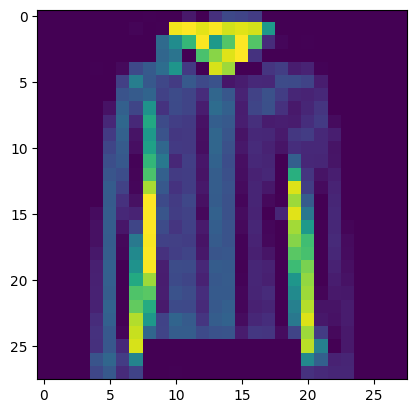

In [6]:
plt.imshow(X_test[6])
plt.show()